## 💰 Sistema Bancário com Inteligência Financeira - Python

Este projeto simula um sistema bancário simples com funcionalidades modernas, como análise de gastos, sugestões de investimento, alertas inteligentes e inteligência adicional para auxiliar no controle financeiro. Uma solução moderna com análise financeira, gráficos sofisticados e assistência inteligente.

---

### 📌 Funcionalidades:
✅ **Gestão de transações bancárias** (depósito, saque e extrato bancário)  
✅ **Análise de gastos** com categorias  
✅ **Análises inteligentes** de comportamento financeiro  
✅ **Sugestões personalizadas** de economia e investimento  
✅ **Visualização gráfica** das movimentações, gráficos interativos e animações  
✅ **Alertas financeiros inteligentes**  

## 📋 Operações Bancárias Básicas

In [19]:
# Carrega bibliotecas principais para análise e visualização
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [20]:
saldo = 0
limite = 500
extrato = []
numero_saques = 0
LIMITE_SAQUES = 3
movimentacoes = []

menu = """\n
🔹 [d] Depositar
🔹 [s] Sacar
🔹 [e] Extrato
🔹 [q] Sair

=> """

while True:
    opcao = input(menu)

    if opcao == "d":
        valor = float(input("Informe o valor do depósito: R$ "))
        categoria = input("Informe a categoria do depósito: ")

        if valor > 0:
            saldo += valor
            extrato.append(f"Depósito: R$ {valor:.2f}")
            movimentacoes.append({'Data': datetime.today(), 'Valor': valor, 'Tipo': 'Depósito', 'Categoria': categoria})
            print("✅ Depósito realizado com sucesso.")
        else:
            print("❌ Valor inválido para depósito.")

    elif opcao == "s":
        valor = float(input("Informe o valor do saque: R$ "))
        categoria = input("Informe a categoria do saque: ")

        excedeu_saldo = valor > saldo
        excedeu_limite = valor > limite
        excedeu_saques = numero_saques >= LIMITE_SAQUES

        if excedeu_saldo:
            print("❌ Saldo insuficiente.")
        elif excedeu_limite:
            print("❌ Valor excede o limite de R$ 500.00.")
        elif excedeu_saques:
            print("❌ Limite de saques diários atingido.")
        elif valor > 0:
            saldo -= valor
            extrato.append(f"Saque:    R$ {valor:.2f}")
            movimentacoes.append({'Data': datetime.today(), 'Valor': -valor, 'Tipo': 'Saque', 'Categoria': categoria})
            numero_saques += 1
            print("✅ Saque realizado com sucesso.")
        else:
            print("❌ Valor inválido para saque.")

    elif opcao == "e":
        HEADER = "\033[95m"
        OKGREEN = "\033[92m"
        FAIL = "\033[91m"
        OKBLUE = "\033[94m"
        WARNING = "\033[93m"
        ENDC = "\033[0m"
        BOLD = "\033[1m"

        print("\n" + HEADER + "="*30 + ENDC)
        print(BOLD + "       EXTRATO BANCÁRIO" + ENDC)
        print(HEADER + "="*30 + ENDC)
        if not extrato:
            print(WARNING + "Não foram realizadas movimentações." + ENDC)
        else:
            for item in extrato:
                if "Depósito" in item:
                    print(OKGREEN + item + ENDC)
                elif "Saque" in item:
                    print(FAIL + item + ENDC)
                else:
                    print(item)
        print(OKBLUE + "-"*30 + ENDC)
        print(BOLD + f"Saldo atual |  R$ {saldo:10.2f}" + ENDC)
        print(HEADER + "="*30 + ENDC)

    elif opcao == "q":
        print("👋 Saindo do sistema.")
        break

    else:
        print("\033[91m❌ Opção inválida.\033[0m")


✅ Depósito realizado com sucesso.
❌ Valor excede o limite de R$ 500.00.
✅ Saque realizado com sucesso.
✅ Saque realizado com sucesso.
✅ Depósito realizado com sucesso.
✅ Saque realizado com sucesso.
❌ Limite de saques diários atingido.

       EXTRATO BANCÁRIO
Depósito: R$ 5000.00
Saque:    R$ 500.00
Saque:    R$ 250.00
Depósito: R$ 1000.00
Saque:    R$ 400.00
------------------------------
Saldo atual |  R$    4850.00
👋 Saindo do sistema.


## 📊 Gráfico das Movimentações por Categoria

In [29]:
# Criando DataFrame com as movimentações registradas
df = pd.DataFrame(movimentacoes)

if not df.empty:
    # Criando coluna AnoMes para animação
    df["AnoMes"] = df["Data"].dt.to_period("M").astype(str)

    # Criando paleta de cores única para cada categoria
    cores_categorias = px.colors.qualitative.Plotly  # Paleta com várias cores distintas

    # Criando gráfico animado com cada categoria em uma cor diferente
    fig = px.bar(
        df,
        x="Categoria",
        y="Valor",
        animation_frame="AnoMes",
        color="Categoria",
        color_discrete_sequence=cores_categorias,
        title="📅 Evolução das Movimentações por Categoria"
    )

    fig.show()

else:
    print("❌ Nenhuma movimentação registrada para gerar o gráfico.")

## 🔍 Visão Geral das Movimentações Bancárias

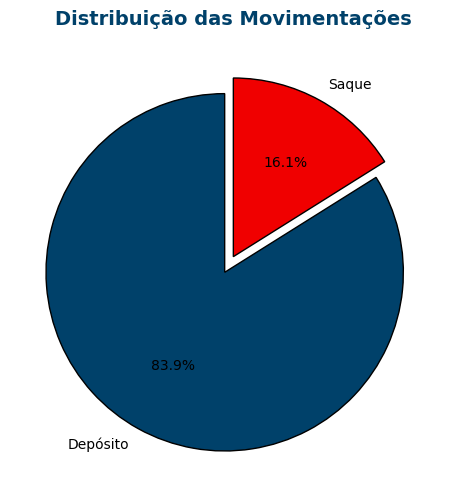

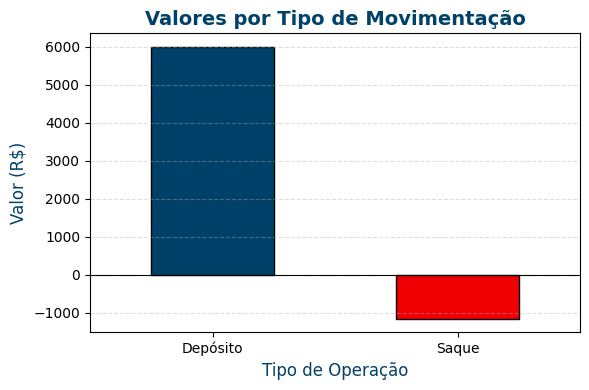

In [22]:
# Criando DataFrame com as movimentações registradas
df = pd.DataFrame(movimentacoes)

if not df.empty:
    # Criando uma cópia dos valores para o gráfico de pizza (todos positivos)
    df_pizza = df.copy()
    df_pizza["Valor"] = df_pizza["Valor"].abs()
    valores_pizza = df_pizza.groupby("Tipo")["Valor"].sum()

    # Paleta de cores premium
    cores_premium = ["#00416A", "#F00000"]  # Azul escuro e vermelho

    # Destacando o maior setor no gráfico de pizza
    explode = [0.1 if i == valores_pizza.idxmax() else 0 for i in valores_pizza.index]

    # Gráfico de Pizza
    plt.figure(figsize=(5, 5))
    plt.pie(
        valores_pizza,
        labels=valores_pizza.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=cores_premium,
        explode=explode,
        wedgeprops={"edgecolor": "black"}
    )
    plt.title("Distribuição das Movimentações", fontsize=14, fontweight="bold", color="#00416A")
    plt.tight_layout()
    plt.show()

    # Gráfico de Barras com valores reais (saques negativos)
    valores_barra = df.groupby("Tipo")["Valor"].sum()

    plt.figure(figsize=(6, 4))
    valores_barra.plot(kind="bar", color=cores_premium, edgecolor="black")

    plt.title("Valores por Tipo de Movimentação", fontsize=14, fontweight="bold", color="#00416A")
    plt.xlabel("Tipo de Operação", fontsize=12, color="#00416A")
    plt.ylabel("Valor (R$)", fontsize=12, color="#00416A")
    plt.axhline(0, color="black", linewidth=0.8)  # Linha do eixo X
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Nenhuma movimentação registrada para gerar os gráficos.")


## 📈 Assistente Financeiro

In [23]:
# Criando DataFrame com as movimentações registradas
df = pd.DataFrame(movimentacoes)

if not df.empty:
    # Convertendo todos os valores para positivos apenas para análise financeira
    df["Valor"] = df["Valor"].abs()

    # Calculando totais de depósitos e saques
    total_depositos = df[df["Tipo"] == "Depósito"]["Valor"].sum()
    total_saques = df[df["Tipo"] == "Saque"]["Valor"].sum()
    saldo_atual = total_depositos - total_saques

    print("🧠 Assistente Financeiro")
    print("-" * 30)

    # Sugestões de economia
    if total_saques > total_depositos * 0.6:
        print("⚠️ Você está gastando mais de 60% do que deposita. Considere rever seus gastos.")
    else:
        print("✅ Ótimo! Seus gastos estão equilibrados com seus depósitos.")

    # Sugestão de meta
    meta_economia = saldo_atual * 0.2
    print(f"🎯 Sugestão: reserve pelo menos R$ {meta_economia:.2f} como meta de economia futura.")

    # Simulação de investimento simples
    rentabilidade_mensal = 0.008  # Exemplo: 0.8% ao mês (CDB, Tesouro Selic...)
    valor_investido = saldo_atual * 0.3
    rendimento_estimado = valor_investido * rentabilidade_mensal

    print(f"📈 Se investir R$ {valor_investido:.2f}, você pode ganhar cerca de R$ {rendimento_estimado:.2f} por mês.")
else:
    print("❌ Nenhuma movimentação registrada para análise financeira.")

🧠 Assistente Financeiro
------------------------------
✅ Ótimo! Seus gastos estão equilibrados com seus depósitos.
🎯 Sugestão: reserve pelo menos R$ 970.00 como meta de economia futura.
📈 Se investir R$ 1455.00, você pode ganhar cerca de R$ 11.64 por mês.


## 💡 Sugestão de Investimentos

In [24]:
# Verifica se o DataFrame não está vazio antes de calcular o saldo
if not df.empty:
    saldo_atual = df["Valor"].sum()

    if saldo_atual > 1000:
        print("✅ Sugerimos dividir seu saldo da seguinte forma:")
        print("- 40% em Tesouro Direto ou CDB")
        print("- 30% em Fundos Multimercado")
        print("- 30% em Ações ou ETFs")
    else:
        print("⚠️ Saldo baixo. Recomendamos focar em redução de despesas.")
else:
    print("❌ Nenhuma movimentação registrada para análise financeira.")

✅ Sugerimos dividir seu saldo da seguinte forma:
- 40% em Tesouro Direto ou CDB
- 30% em Fundos Multimercado
- 30% em Ações ou ETFs


## 🚨 Alertas Financeiros Inteligentes

In [25]:
# Criando DataFrame com as movimentações
gastos = pd.DataFrame(movimentacoes)

# Filtrando apenas os saques do mês atual
gasto_mensal = gastos[(gastos["Data"].dt.month == datetime.today().month) & (gastos["Tipo"] == "Saque")]["Valor"].sum()

# Definindo limite de gastos
limite_gastos = 3000

if gasto_mensal > limite_gastos:
    print(f"🚨 ALERTA: Seus gastos do mês já somam R$ {gasto_mensal:.2f} e ultrapassaram o limite de R$ {limite_gastos}.")
else:
    print(f"✅ Gastos do mês sob controle: R$ {gasto_mensal:.2f}")

✅ Gastos do mês sob controle: R$ -1150.00


## 🤖 Robô Consultor em Ação

🤖✅ Investimento realizado com sucesso! 💰


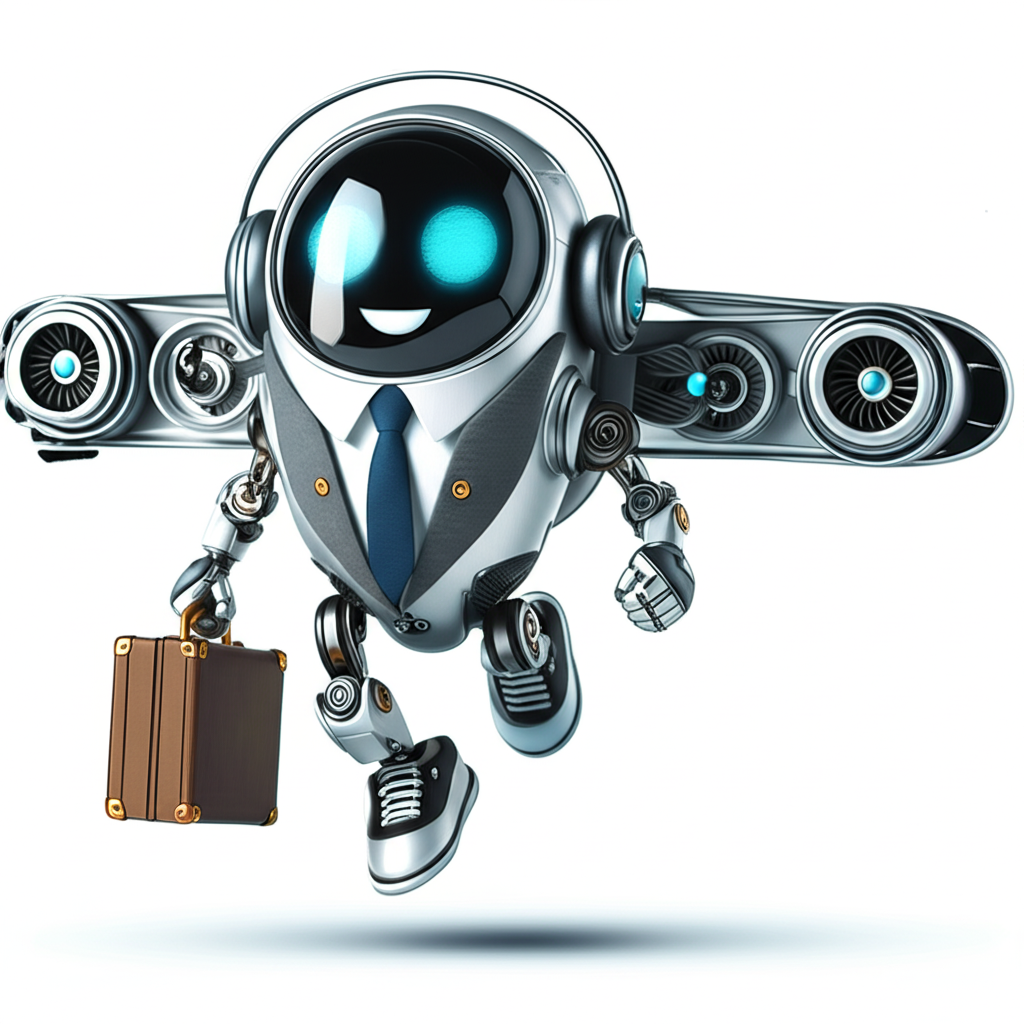

💰 Novo saldo disponível: R$ 4050.00


In [30]:
import os
import time
from datetime import datetime
from IPython.display import clear_output, display, Image

# Criando DataFrame com as movimentações
df = pd.DataFrame(movimentacoes)

# Garantindo que a coluna 'Valor' é numérica
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
df = df.dropna(subset=["Valor"])

# Cálculo saldo
saldo = df["Valor"].sum()

def mostrar_personagem_ao_investir():
    frames = [
        "🤖💬 Calculando o melhor investimento...",
        "🤖💬 Analisando mercado 📈...",
        "🤖💬 Preparando a aplicação 🏦...",
        "🤖✅ Investimento realizado com sucesso! 💰"
    ]
    for frame in frames:
        clear_output(wait=True)
        print(frame)
        time.sleep(1.2)

# Pergunta se o usuário deseja investir
aceitou = input("Você gostaria de investir R$ 200,00? (s/n): ").strip().lower()

if aceitou == 's':
    if saldo >= 200:
        mostrar_personagem_ao_investir()

        # Caminho absoluto para a imagem
        caminho_imagem = os.path.join(os.getcwd(), "robozinho_consultor.png")
        
        if os.path.exists(caminho_imagem):
            display(Image(filename=caminho_imagem))
        else:
            print(f"⚠️ Imagem não encontrada no caminho: {caminho_imagem}")

        # Registrar investimento como saque
        movimentacoes.append({
            "Data": datetime.today(),
            "Valor": -200,
            "Tipo": "Saque",
            "Categoria": "Investimento"
        })

        # Recalcular saldo com a nova movimentação
        df = pd.DataFrame(movimentacoes)
        df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
        df = df.dropna(subset=["Valor"])
        saldo = df["Valor"].sum()

        print(f"💰 Novo saldo disponível: R$ {saldo:.2f}")
    else:
        print("❌ Saldo insuficiente para realizar o investimento.")
else:
    print(f"✅ Seu saldo continua o mesmo: R$ {saldo:.2f}")


## ✅ Conclusão

Este sistema bancário simples demonstra como Python pode ser usado para simular operações financeiras, aplicar lógica de negócios e oferecer visualizações modernas. Com o auxílio de inteligência visual (robô consultor) e sugestões de investimento, o projeto vai além de um simples extrato, promovendo uma experiência de aprendizado prática e interativa.